**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
import pandas_datareader as web

**READING DATA FROM YAHOO FINANCE SOURCE**

In [2]:
data=web.DataReader('FB',data_source='yahoo',start='2012-01-01',end='2021-05-15')
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2021-05-10,314.579987,304.829987,314.350006,305.970001,24239200,305.970001
2021-05-11,306.839996,299.690002,300.750000,306.529999,18920100,306.529999
2021-05-12,304.959991,298.190002,301.130005,302.549988,24645500,302.549988


**STATISTICAL DESCRIPTION OF DATA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2262 entries, 2012-05-18 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2262 non-null   float64
 1   Low        2262 non-null   float64
 2   Open       2262 non-null   float64
 3   Close      2262 non-null   float64
 4   Volume     2262 non-null   int64  
 5   Adj Close  2262 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 123.7 KB


In [4]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2262.000000,2262.000000,2262.000000,2262.000000,2.262000e+03,2262.000000
mean,132.122154,129.001388,130.579655,130.608727,3.165358e+07,130.608727
std,74.726152,72.923375,73.812884,73.844592,2.813507e+07,73.844592
min,18.270000,17.549999,18.080000,17.730000,5.913100e+06,17.730000
25%,74.567501,73.062498,74.000000,73.754999,1.614525e+07,73.754999
50%,128.334999,125.820000,126.759998,126.830002,2.304425e+07,126.830002
75%,181.985004,178.770000,180.507496,180.437496,3.684325e+07,180.437496
max,331.809998,324.500000,330.119995,329.510010,5.735764e+08,329.510010


In [5]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999648,0.999765,0.999736,-0.423055,0.999736
Low,0.999648,1.000000,0.999725,0.999766,-0.432842,0.999766
Open,0.999765,0.999725,1.000000,0.999500,-0.427529,0.999500
Close,0.999736,0.999766,0.999500,1.000000,-0.428279,1.000000
Volume,-0.423055,-0.432842,-0.427529,-0.428279,1.000000,-0.428279
Adj Close,0.999736,0.999766,0.999500,1.000000,-0.428279,1.000000


Overall, the adjusted closing price will give you a better idea of the overall value of the stock and help you make informed decisions about buying and selling, while the closing stock price will tell you the exact cash value of a share of stock at the end of the trading day.

In [7]:
df = pd.DataFrame(data, columns=['Adj Close'])
df = df.reset_index()

In [8]:
df.head()

,Date,Adj Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2262 non-null   datetime64[ns]
 1   Adj Close  2262 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB


In [10]:
df.isna().values.any()

False

**VISUALIZATION OF DATA**

1. Box Plot

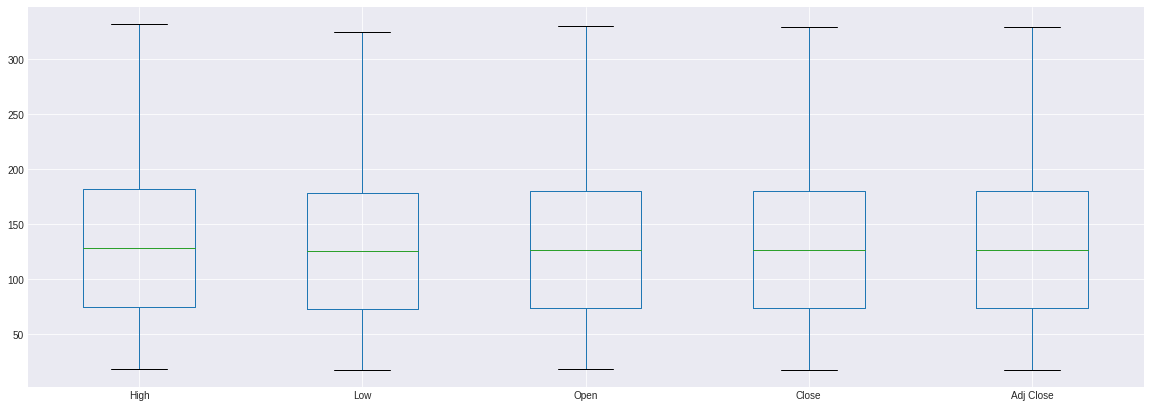

In [11]:
import seaborn as sns
plt.figure(figsize=(20,7))
boxplot = data.boxplot(column=['High', 'Low', 'Open','Close','Adj Close'])

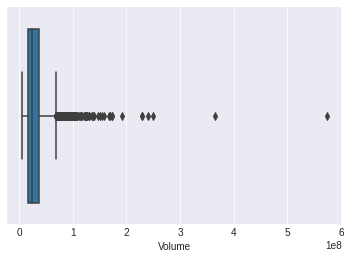

In [12]:
d = pd.DataFrame(data)
import seaborn as sns
sns.boxplot(x=d['Volume'])

This shows that the volume column contains lot of outlier values which might affect the results of prediction. Hence we remove the volume column itself as part of outlier elimination.

2. Visualization of Adjusted Close Price vs Data

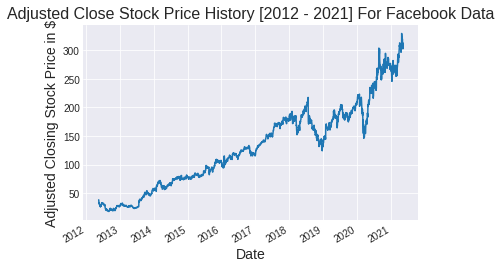

In [13]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Adj Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Adjusted Close Stock Price History [2012 - 2021] For Facebook Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Adjusted Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

3. CORRELATION BETWEEN VARIABLES

Text(0.5, 1.0, 'Correlation between features')

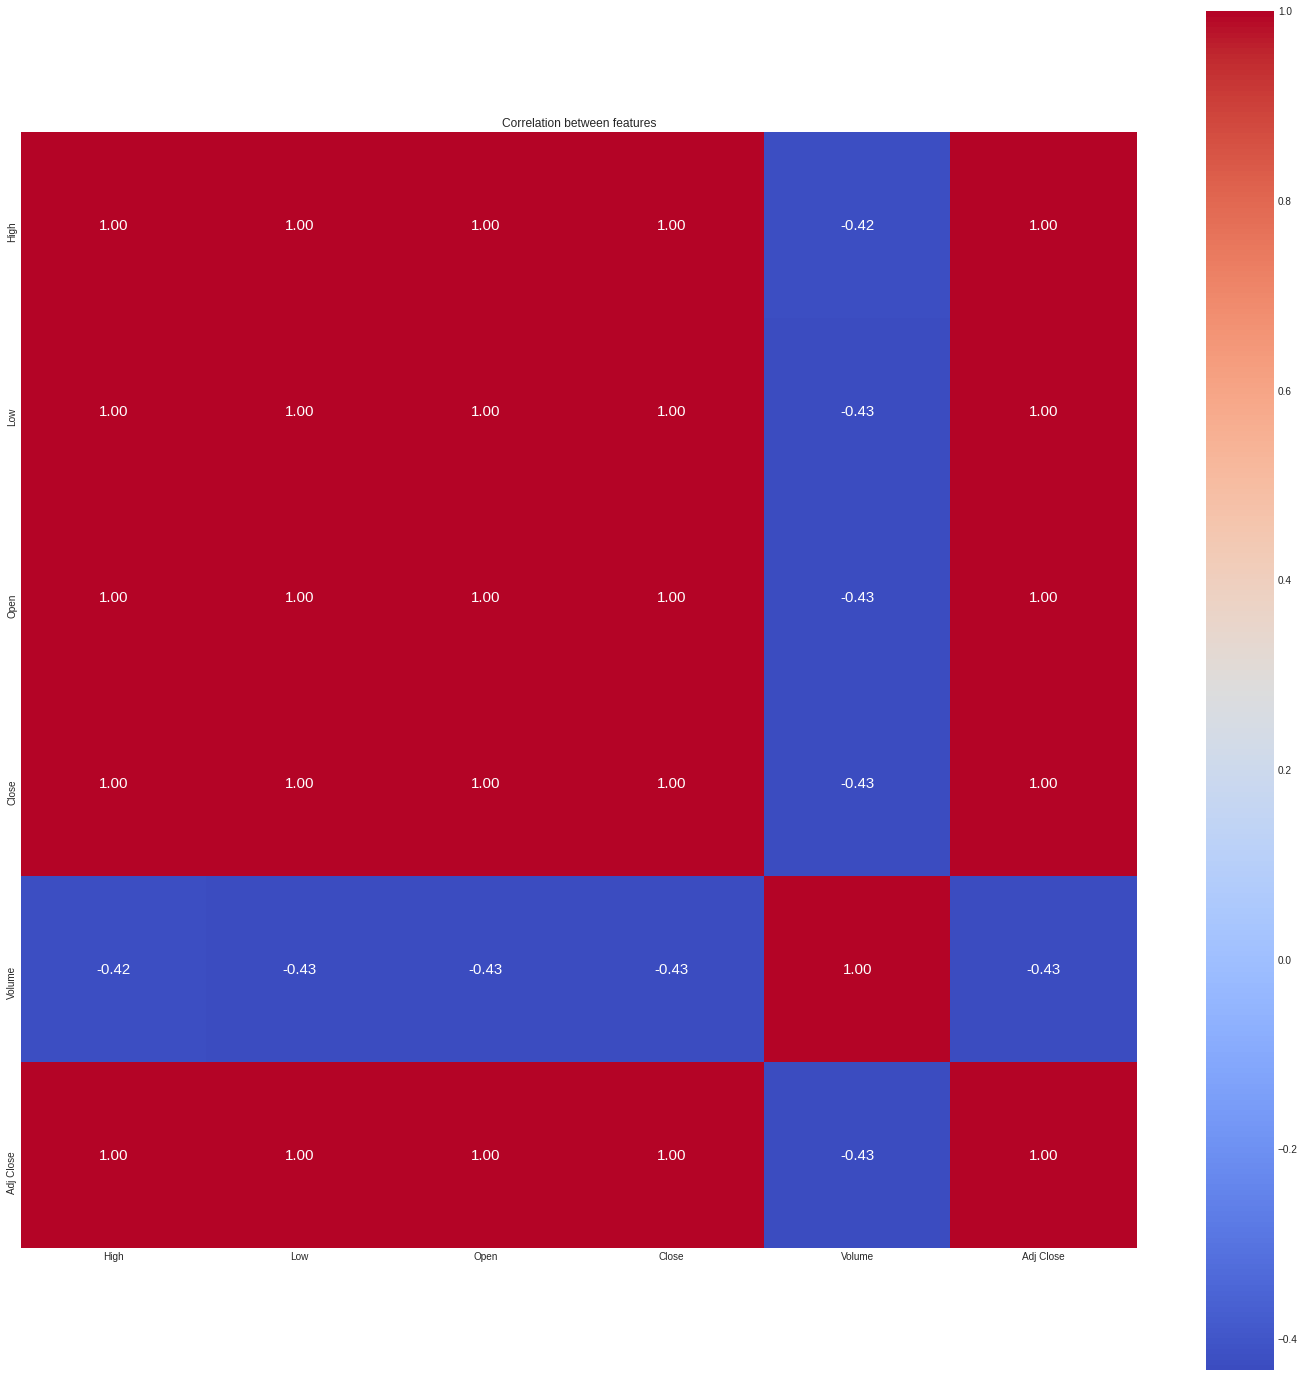

In [14]:
correlation=data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

**PREDICTING THE ACCURACY OF PREDICTION OF STOCK PRICES USING ML AND DEEP LEARNING**

1. PREDICTION USING LINEAR REGRESSION

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.10812155165179342
Intercept:  8.032043381358704


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


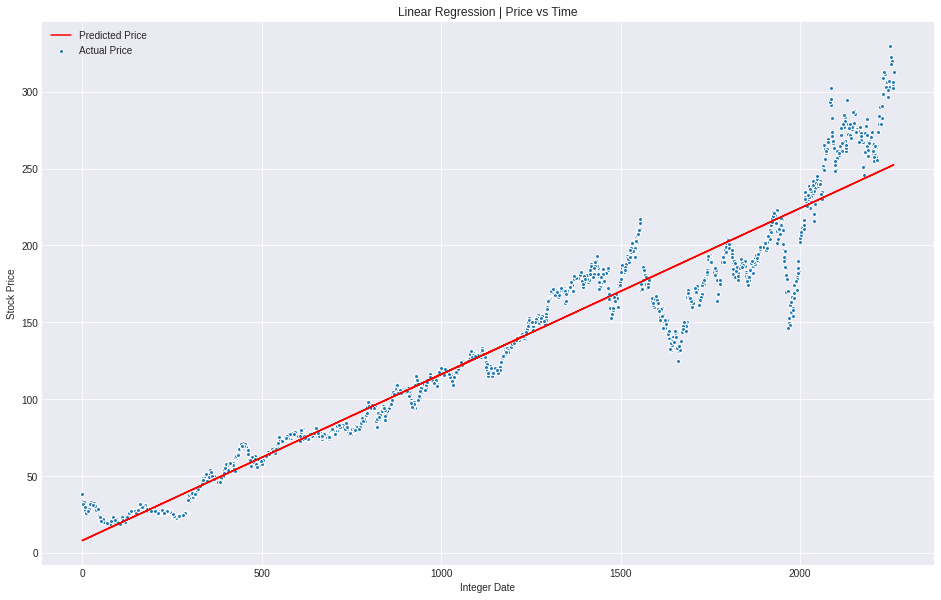

In [17]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1458    183.710007       165.673266
1895    201.639999       212.922384
702      80.010002        83.933373
300      36.799999        40.468509
1113    130.000000       128.371330
...            ...              ...
51       20.879999        13.546243
1270    153.119995       145.346414
2136    275.079987       238.979678
2183    274.500000       244.061391
854      94.260002       100.367848

[453 rows x 2 columns]


1.1 Calculating the accuracy of the prediction

In [19]:
from sklearn import metrics
import math
rmse_linear=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_linear=model.score(X_test,y_test)

print("Root mean square error= ",rmse_linear)
print("Accuracy Score= ",accuracy_linear*100)

Root mean square error=  20.38945674714466
Accuracy Score=  93.2917785084951


1.2 Graphichal prediction 

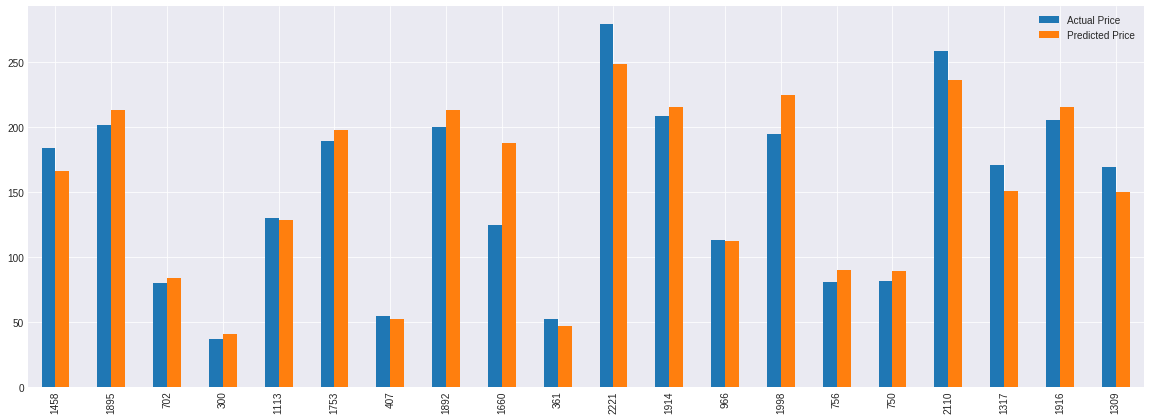

In [20]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

2.PREDICTION USING KNN

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = KNeighborsRegressor()
model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [22]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
697      78.970001        79.553999
2190    267.079987       266.458002
951     109.949997       107.756000
868     101.970001       104.509999
1494    173.589996       171.188004
...            ...              ...
1334    173.210007       171.748001
1253    150.330002       149.067999
180      28.650000        28.510000
1074    123.889999       124.784001
2137    276.950012       275.589996

[453 rows x 2 columns]


2.1 Calculating the Accuracy

In [23]:
from sklearn import metrics
import math
rmse_knn=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_knn=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_knn)
print("Accurcy Score= ",accuracy_knn*100)

Root mean square error=  3.123346256033217
Accurcy Score=  99.80564089943387


2.2 Graphical Representation

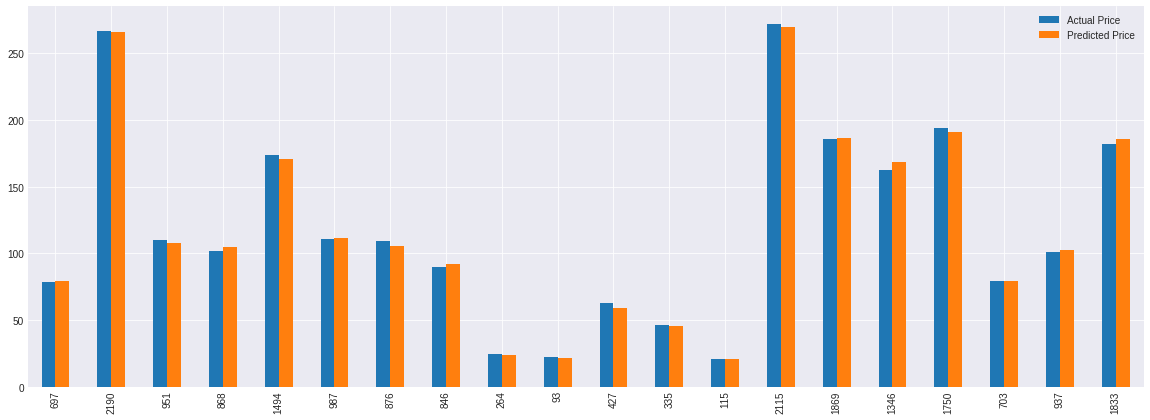

In [24]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

3.PREDICTION USING DECISION TREE REGRESSOR

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model =DecisionTreeRegressor ()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
2119    267.559998       261.399994
1508    183.759995       183.199997
31       31.200001        30.770000
697      78.970001        80.410004
1373    182.660004       180.059998
...            ...              ...
2250    329.510010       307.100006
1154    119.239998       119.870003
1190    134.190002       134.139999
687      76.230003        75.190002
2252    322.579987       325.079987

[453 rows x 2 columns]


3.1 Calculating the Accuracy

In [27]:
from sklearn import metrics
import math
rmse_dt=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_dt=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_dt)
print("Accurcy Score= ",accuracy_dt*100)

Root mean square error=  3.1479336012627432
Accurcy Score=  99.80817507453601


3.2 Graphical Representation

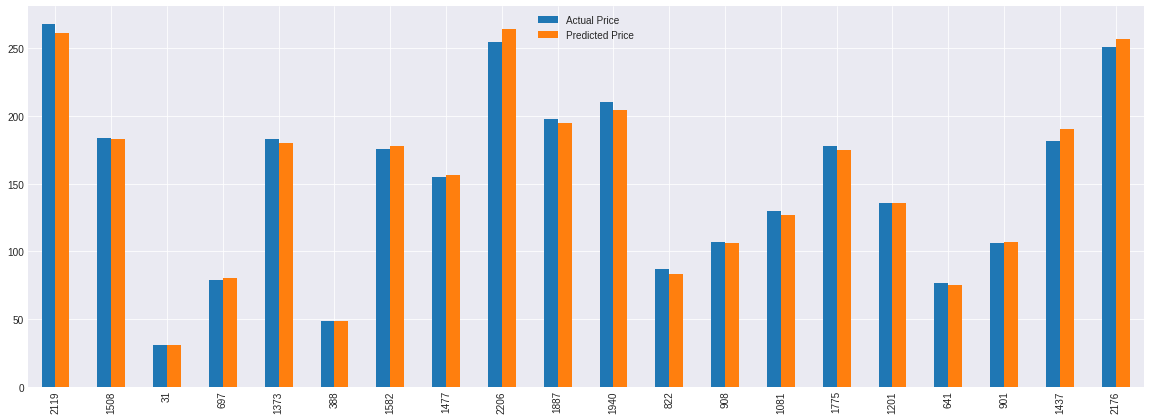

In [28]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

4.PREDICTION USING LASSO

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import Lasso
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = Lasso()
# Fit linear model using the train data set
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
47       26.850000        12.734359
667      76.279999        80.035954
971     114.099998       113.035446
115      21.180000        20.115824
1370    177.880005       156.347279
...            ...              ...
720      81.669998        85.789155
1748    192.529999       197.379542
1356    172.500000       154.827565
369      49.119999        47.687768
387      46.730000        49.641685

[453 rows x 2 columns]


4.1 Calculating the Accuracy

In [31]:
from sklearn import metrics
import math
rmse_lasso=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_lasso=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_lasso)
print("Accurcy Score= ",accuracy_lasso*100)

Root mean square error=  18.497097587106566
Accurcy Score=  94.28965609316482


4.2 Graphical Representation

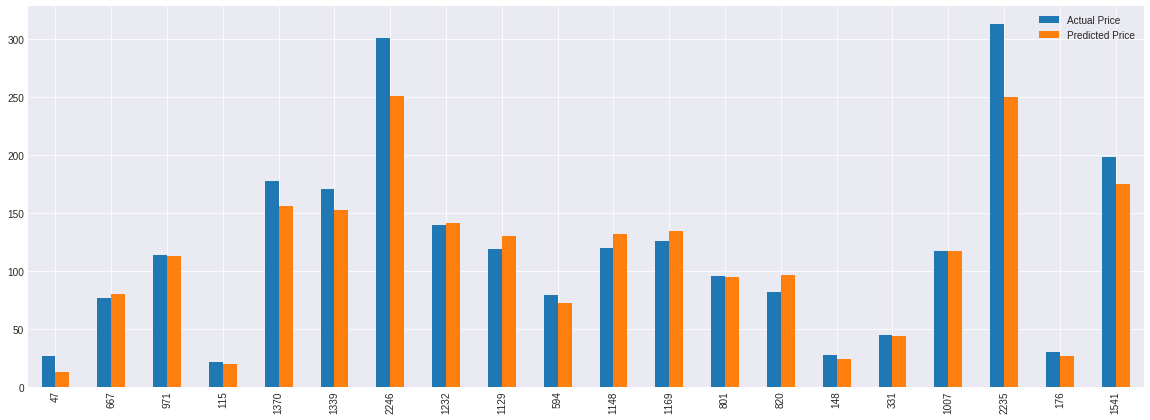

In [32]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

5. PREDICTION USING ELASTIC NET

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import ElasticNet
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = ElasticNet()
# Fit linear model using the train data set
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1648    139.630005       187.596977
1120    130.990005       129.686348
1616    154.050003       184.087242
919      98.370003       107.640825
310      36.650002        40.846180
...            ...              ...
192      27.389999        27.904032
2153    283.399994       242.984983
669      75.180000        80.221020
2104    261.790009       237.610701
1104    128.990005       127.931481

[453 rows x 2 columns]


5.1 Calculating the Accuracy

In [35]:
from sklearn import metrics
import math
rmse_el=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_el=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_el)
print("Accurcy Score= ",accuracy_el*100)

Root mean square error=  17.918819800373004
Accurcy Score=  93.58445286830039


5.2 Graphical Representation

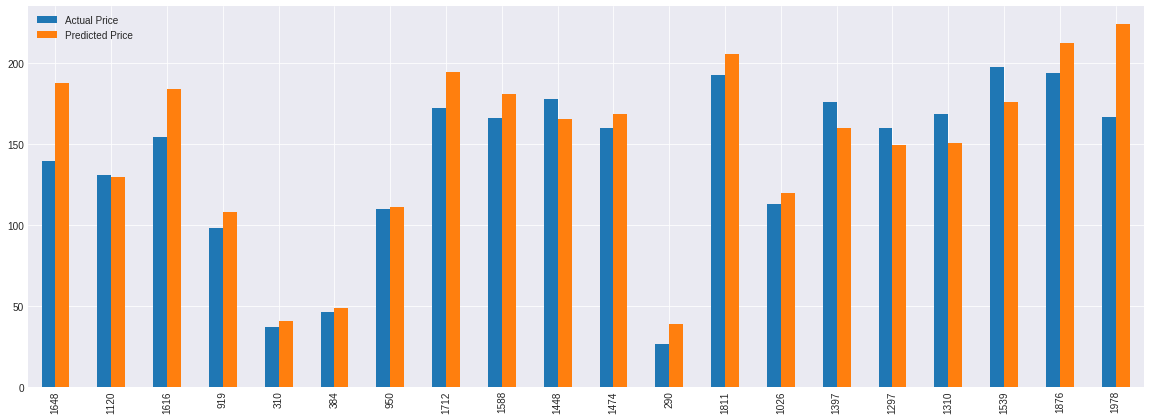

In [36]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

6. PREDICTION USING LSTM STACKED ESTIMATOR

In [37]:
df1=data.reset_index()['Adj Close']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [40]:
import numpy

def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [41]:
 time_step=100
 X_train,y_train=create_dataset(train_data,time_step)
 X_test,ytest=create_dataset(train_data,time_step)

In [42]:
print(X_train)

[[0.06575149 0.05228045 0.04256206 ... 0.0101995  0.00856373 0.00801847]
 [0.05228045 0.04256206 0.04576945 ... 0.00856373 0.00801847 0.00612611]
 [0.04256206 0.04576945 0.04907306 ... 0.00801847 0.00612611 0.00647893]
 ...
 [0.49246263 0.49416255 0.49031369 ... 0.5339021  0.53284366 0.53678873]
 [0.49416255 0.49031369 0.49040991 ... 0.53284366 0.53678873 0.49660014]
 [0.49031369 0.49040991 0.51366348 ... 0.53678873 0.49660014 0.48245554]]


In [43]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 9s 232ms/step - loss: 0.0332 - val_loss: 0.0023
Epoch 2/100
22/22 [==============================] - 4s 178ms/step - loss: 0.0014 - val_loss: 2.6784e-04
Epoch 3/100
22/22 [==============================] - 4s 183ms/step - loss: 3.0556e-04 - val_loss: 1.7868e-04
Epoch 4/100
22/22 [==============================] - 4s 182ms/step - loss: 1.6655e-04 - val_loss: 1.5245e-04
Epoch 5/100
22/22 [==============================] - 4s 191ms/step - loss: 1.5008e-04 - val_loss: 1.5183e-04
Epoch 6/100
22/22 [==============================] - 4s 190ms/step - loss: 1.6013e-04 - val_loss: 1.5777e-04
Epoch 7/100
22/22 [==============================] - 4s 192ms/step - loss: 1.5937e-04 - val_loss: 1.6054e-04
Epoch 8/100
22/22 [==============================] - 4s 195ms/step - loss: 1.4861e-04 - val_loss: 1.4825e-04
Epoch 9/100
22/22 [==============================] - 4s 193ms/step - loss: 1.4581e-04 - val_loss: 1.5418e-04
Epoch 10/100
22/22 [===========

In [48]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [49]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

6.1 Calculating the Accuracy

In [50]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm=math.sqrt(mean_squared_error(ytest,test_predict))
print("RMSE score of LSTM =",rmse_lstm)


RMSE score of LSTM = 104.86969536002336


7.PREDICTION USING FBPROPHET

In [51]:
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from fbprophet import Prophet

In [52]:
model=Prophet()

In [53]:
dfb=data.reset_index()

In [54]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
1,2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2,2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
3,2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
4,2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...,...
2257,2021-05-10,314.579987,304.829987,314.350006,305.970001,24239200,305.970001
2258,2021-05-11,306.839996,299.690002,300.750000,306.529999,18920100,306.529999
2259,2021-05-12,304.959991,298.190002,301.130005,302.549988,24645500,302.549988
2260,2021-05-13,308.859985,302.769989,306.079987,305.260010,18068800,305.260010


In [55]:
dfb[['ds','y']]=dfb[['Date','Adj Close']]

In [ ]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000,2012-05-18,38.230000
1,2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999,2012-05-21,34.029999
2,2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000,2012-05-22,31.000000
3,2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000,2012-05-23,32.000000
4,2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999,2012-05-24,33.029999
...,...,...,...,...,...,...,...,...,...
2251,2021-04-30,329.820007,324.500000,326.140015,325.079987,26322000,325.079987,2021-04-30,325.079987
2252,2021-05-03,328.549988,321.839996,326.170013,322.579987,18719500,322.579987,2021-05-03,322.579987
2253,2021-05-04,322.190002,313.119995,320.019989,318.359985,24032600,318.359985,2021-05-04,318.359985
2254,2021-05-05,321.059998,314.489990,318.190002,315.019989,15560900,315.019989,2021-05-05,315.019989


In [56]:
model.fit(dfb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
prediction=model.make_future_dataframe(periods=200)

In [58]:
pre=model.predict(prediction)
print(pre)

             ds       trend  ...  multiplicative_terms_upper        yhat
0    2012-05-18   23.400681  ...                         0.0   21.679184
1    2012-05-21   23.462015  ...                         0.0   21.236442
2    2012-05-22   23.482460  ...                         0.0   21.435263
3    2012-05-23   23.502904  ...                         0.0   21.457099
4    2012-05-24   23.523349  ...                         0.0   21.412140
...         ...         ...  ...                         ...         ...
2457 2021-11-26  336.813033  ...                         0.0  332.208145
2458 2021-11-27  336.999377  ...                         0.0  342.673654
2459 2021-11-28  337.185720  ...                         0.0  342.894429
2460 2021-11-29  337.372063  ...                         0.0  332.577353
2461 2021-11-30  337.558407  ...                         0.0  333.070591

[2462 rows x 19 columns]


7.1 Calclulating the Accuracy

In [59]:
import math
from sklearn.metrics import mean_squared_error
rmse_fb=math.sqrt(mean_squared_error(pre['trend'],pre['yhat']))
print("RMSE error of FBProphet =",rmse_fb)

RMSE error of FBProphet = 5.046145290076681


7.2 Graphical Visualization

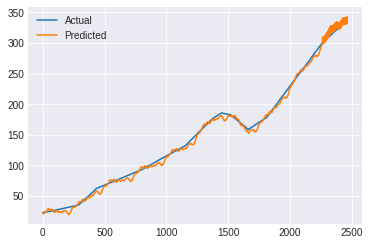

In [60]:
from matplotlib import pyplot
pyplot.plot(pre['trend'], label='Actual')
pyplot.plot(pre['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

**Evaluation of the Performance of Algorithms**

1. BASED ON THE ACCURACY SCORE

In [61]:
scores = [accuracy_linear*100,accuracy_lasso*100,accuracy_knn*100,accuracy_el*100,accuracy_dt*100]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Linear Regression is: 93.2917785084951 %
The accuracy score achieved using Lasso Regression is: 94.28965609316482 %
The accuracy score achieved using KNN is: 99.80564089943387 %
The accuracy score achieved using ElasticNet is: 93.58445286830039 %
The accuracy score achieved using Decision Tree Regressor is: 99.80817507453601 %


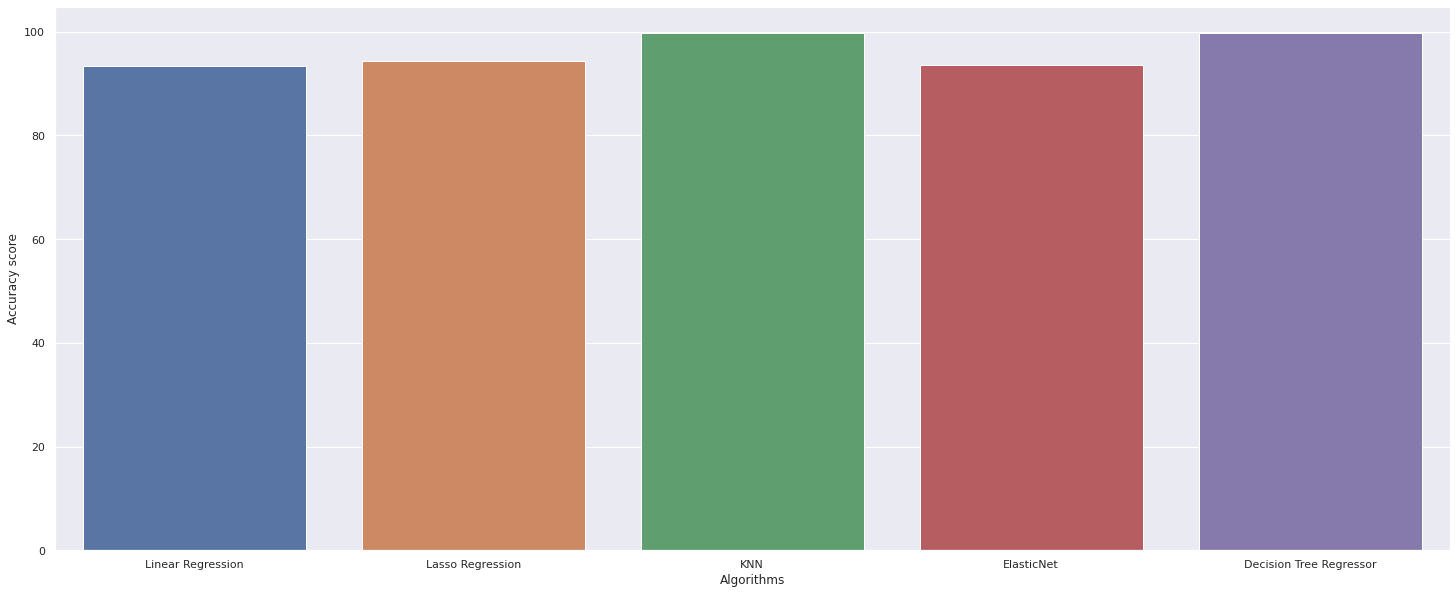

In [62]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

2. BASED ON RMSE VALUES

In [85]:
scores = [rmse_linear,rmse_lasso,rmse_knn,rmse_el,rmse_dt,rmse_lstm,rmse_fb]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor","LSTM","FB PROPHET"]
for i in range(len(algorithms)):
    print("The RMSE Value achieved using "+algorithms[i]+" is: "+str(scores[i])+" ")

The RMSE Value achieved using Linear Regression is: 20.38945674714466 
The RMSE Value achieved using Lasso Regression is: 18.497097587106566 
The RMSE Value achieved using KNN is: 3.123346256033217 
The RMSE Value achieved using ElasticNet is: 17.918819800373004 
The RMSE Value achieved using Decision Tree Regressor is: 3.1479336012627432 
The RMSE Value achieved using LSTM is: 104.86969536002336 
The RMSE Value achieved using FB PROPHET is: 5.046145290076681 


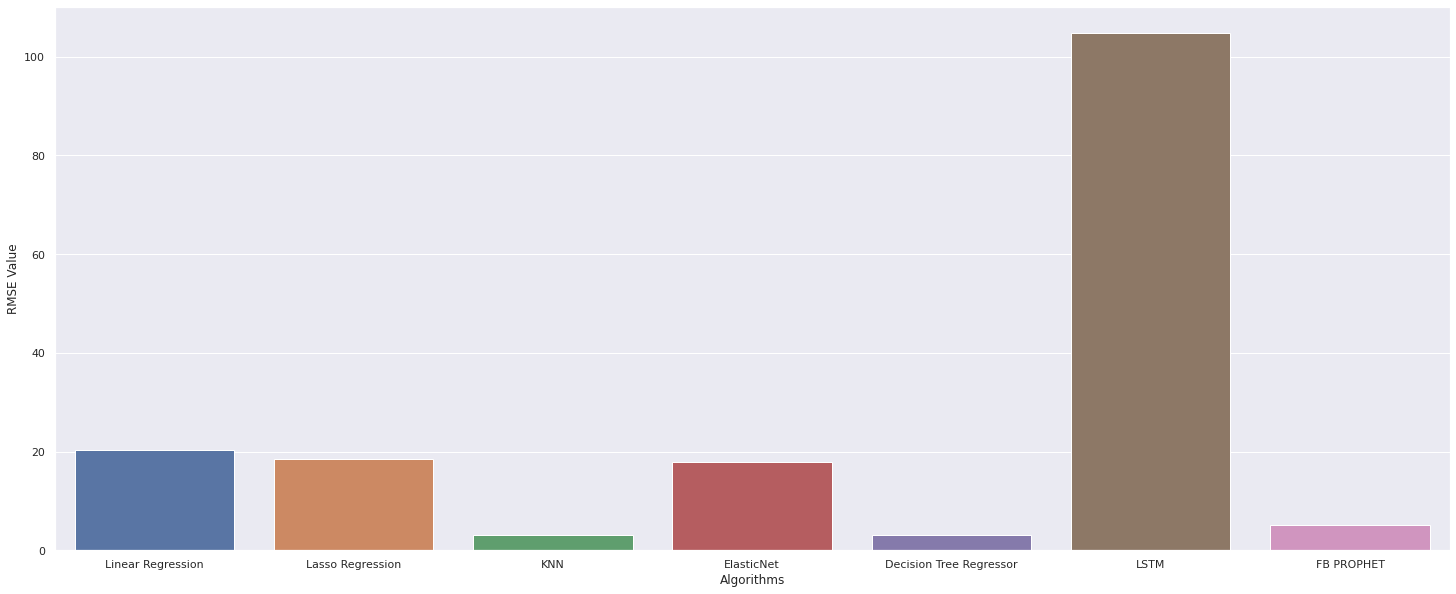

In [86]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("RMSE Value")

sns.barplot(algorithms,scores)

**FORECASTING THE FUTURE STOCK PRICES USING ML AND DEEP LEARNING**

In [65]:
df=web.DataReader('AMZN',data_source='yahoo',start='2012-01-01',end='2021-05-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600,3190.489990
2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800,3223.909912
2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400,3151.939941


1.FORECASTING USING LINEAR REGRESSION

In [66]:
from sklearn import preprocessing
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence_linear = clf.score(X_test, y_test)

forecast_predicted_linear = clf.predict(X_forecast)
print(forecast_predicted_linear)

[3343.54652356 3277.43876901 3400.23085235 3352.17719039 3498.83648358
 3452.01780515 3457.39929468 3426.93645238 3449.99682109 3480.99845427
 3475.38493684 3424.38720482 3462.66325874 3398.92275327 3440.42298584
 3548.77568224 3499.02364349 3550.87435001 3557.89084191 3564.59837788
 3507.21011275 3424.84353961 3377.27306719 3406.13977406 3344.7792067
 3287.20982182 3386.57227586 3243.1937282  3256.44382463 3288.53918469]


In [68]:
print(confidence_linear*100)

98.06622147828195


(737450.0, 738125.4)

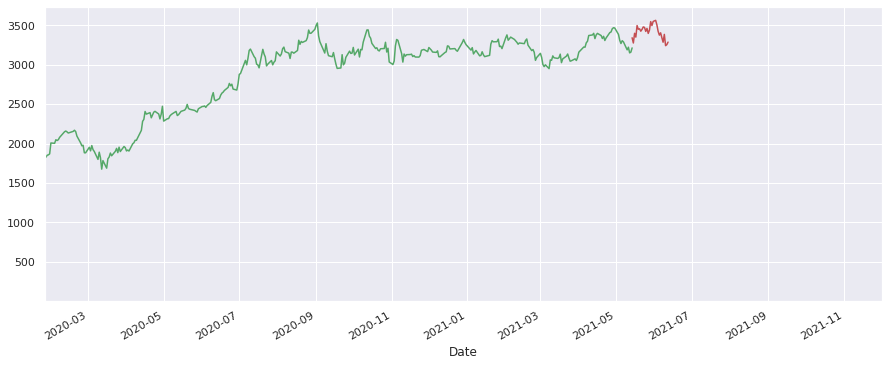

In [69]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_linear,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

2. FORECASTING USING LASSO REGRESSION

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Lasso()
clf.fit(X_train, y_train)

confidence_lasso = clf.score(X_test, y_test)

forecast_predicted_lasso= clf.predict(X_forecast)
print(forecast_predicted_lasso)

[3288.30535169 3299.89900235 3356.69986369 3377.90192602 3425.90468179
 3449.15406828 3486.51473865 3458.35343226 3451.14256417 3461.06104464
 3490.57090862 3437.06348236 3416.78325735 3426.83462868 3428.90161186
 3482.69071477 3514.74505544 3544.83622055 3569.21325223 3609.29527946
 3541.36713109 3421.45840033 3408.28737132 3367.44557166 3384.07221806
 3335.4688513  3290.17207072 3259.72208078 3255.82020081 3273.64608822]


In [ ]:
print(confidence_lasso*100)

97.8612344881031


(737450.0, 738125.4)

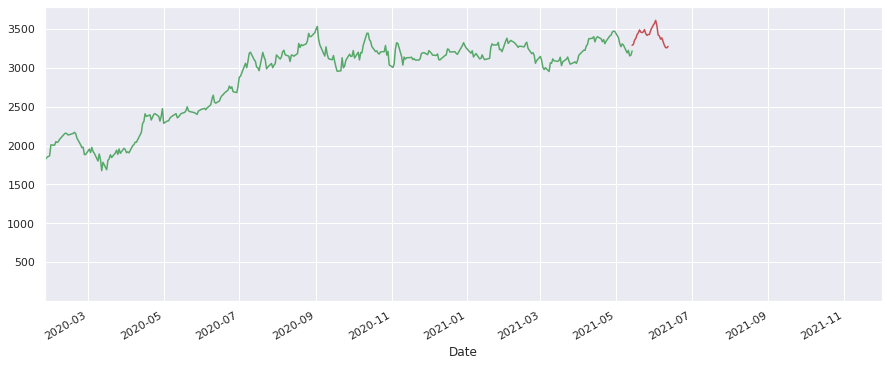

In [71]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_lasso,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

3. FORECASTING USING ELASTIC NET

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = ElasticNet()
clf.fit(X_train, y_train)

confidence_elastic = clf.score(X_test, y_test)

forecast_predicted_elastic= clf.predict(X_forecast)
print(forecast_predicted_elastic)

[3067.89749702 3085.54620794 3122.42058956 3158.38883283 3198.02051136
 3221.66259585 3252.76041632 3209.97689921 3224.78085311 3236.19194653
 3232.37730208 3197.31955473 3189.32594588 3182.80365149 3188.9223388
 3239.66127456 3274.48919801 3301.55776489 3337.13437366 3349.08722096
 3278.59860371 3185.55456413 3156.69335979 3149.55061641 3164.89424435
 3098.04578283 3059.08471651 3038.30427968 3035.09750053 3060.44488012]


In [73]:
print(confidence_elastic*100)

97.05432829929515


(737450.0, 738125.4)

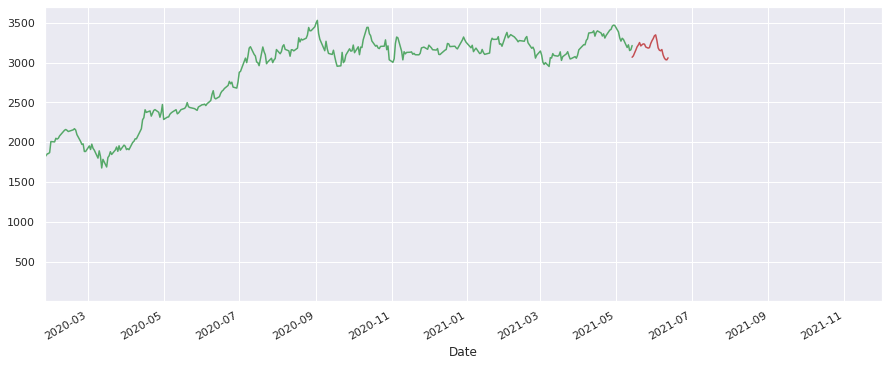

In [74]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_elastic,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

4.FORECASTING USING KNN

In [75]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)

confidence_knn = clf.score(X_test, y_test)

forecast_predicted_knn= clf.predict(X_forecast)
print(forecast_predicted_knn)

[3194.63598633 3172.68598633 3183.69199219 3117.82797852 3162.98999023
 3226.00200195 3208.79399414 3215.35595703 3226.00200195 3215.35595703
 3170.87197266 3160.78598633 3065.55200195 3065.55200195 3136.02197266
 3210.05195313 3222.35996094 3259.70991211 3180.91796875 3190.42001953
 3205.11606445 3229.84003906 3164.87402344 3171.6659668  3178.87993164
 3269.84003906 3208.3859375  3142.3359375  3176.66196289 3174.39599609]


In [76]:
print(confidence_knn*100)

98.9106734785713


(737450.0, 738125.4)

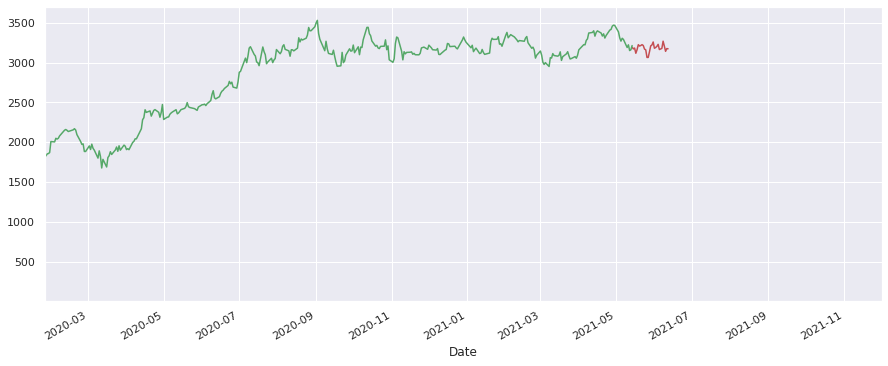

In [77]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

5.FORECASTING USING DECISION TREE

In [78]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

confidence_dt = clf.score(X_test, y_test)

forecast_predicted_dt = clf.predict(X_forecast)
print(forecast_predicted_dt)

[2954.90991211 3120.83007812 3055.29003906 2951.94995117 3091.86010742
 3137.5        3137.5        3442.92993164 3137.5        3137.5
 3137.5        3137.5        3161.         2951.94995117 3161.
 3262.12988281 3442.92993164 3272.70996094 3118.06005859 3118.06005859
 3272.70996094 3148.72998047 3062.85009766 3104.19995117 2951.94995117
 3308.63989258 2954.90991211 3137.38989258 3165.88989258 3305.        ]


In [79]:
print(confidence_dt*100)

98.22659684345659


(737450.0, 738125.4)

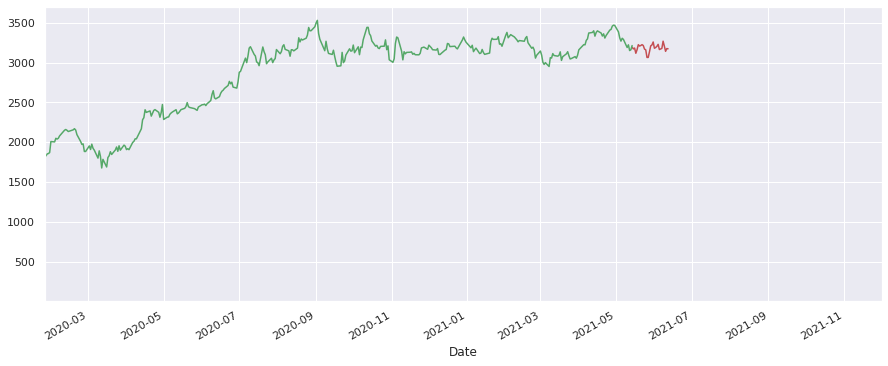

In [80]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

In [81]:
compare=pd.DataFrame({'Linear Regression':forecast_predicted_linear,'Lasso':forecast_predicted_lasso,'Decision tree Regressor':forecast_predicted_dt,'Elastic Net':forecast_predicted_elastic,'K Neighbhors Regressor':forecast_predicted_knn})

In [82]:
compare.head(20)

,Linear Regression,Lasso,Decision tree Regressor,Elastic Net,K Neighbhors Regressor
0,3343.546524,3288.305352,2954.909912,3067.897497,3194.635986
1,3277.438769,3299.899002,3120.830078,3085.546208,3172.685986
2,3400.230852,3356.699864,3055.290039,3122.420590,3183.691992
3,3352.177190,3377.901926,2951.949951,3158.388833,3117.827979
4,3498.836484,3425.904682,3091.860107,3198.020511,3162.989990
5,3452.017805,3449.154068,3137.500000,3221.662596,3226.002002
6,3457.399295,3486.514739,3137.500000,3252.760416,3208.793994
7,3426.936452,3458.353432,3442.929932,3209.976899,3215.355957
8,3449.996821,3451.142564,3137.500000,3224.780853,3226.002002
9,3480.998454,3461.061045,3137.500000,3236.191947,3215.355957


**EVALUATION OF PERFORMANCE IN FORECASTING**

In [88]:
scores = [confidence_linear,confidence_lasso,confidence_knn,confidence_elastic,confidence_dt]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The confidence scores achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+"%")

The confidence scores achieved using Linear Regression is: 98.06622147828195%
The confidence scores achieved using Lasso Regression is: 98.40662627025033%
The confidence scores achieved using KNN is: 98.9106734785713%
The confidence scores achieved using ElasticNet is: 97.05432829929515%
The confidence scores achieved using Decision Tree Regressor is: 98.22659684345659%


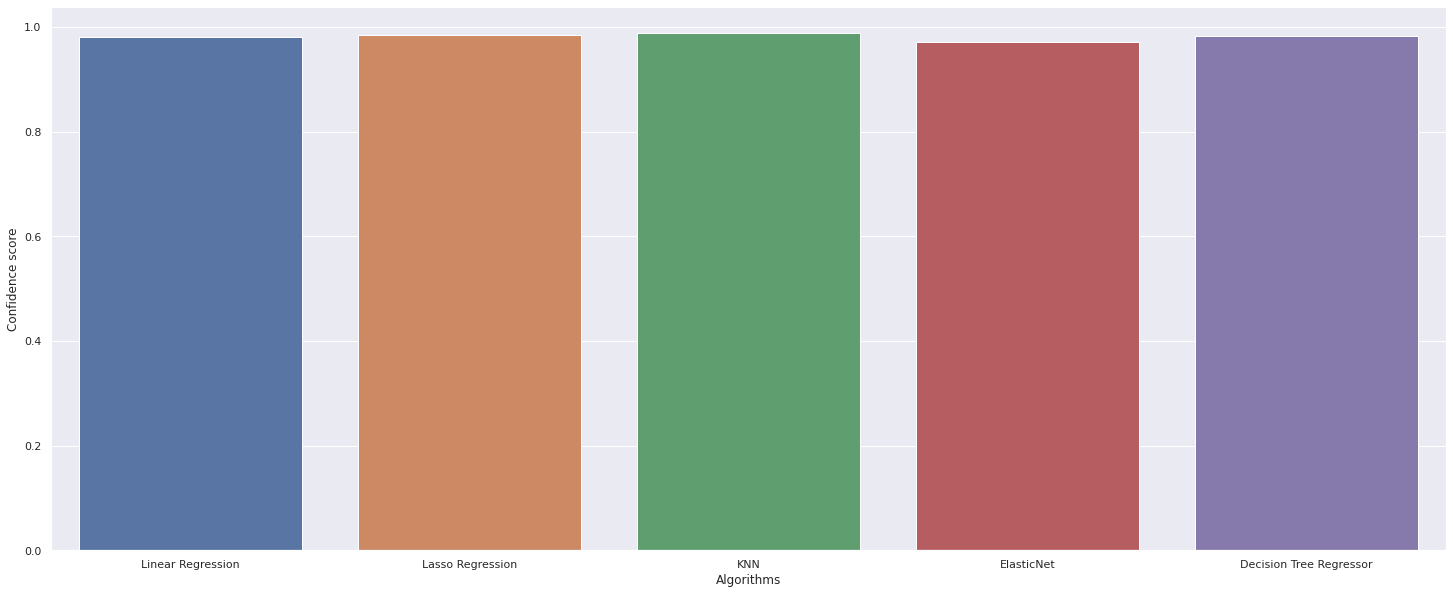

In [89]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Confidence score")

sns.barplot(algorithms,scores)